# Mission 1

In [1]:
# Mission 1 Base code
import pandas as pd

# for google drive
from google.colab import drive
drive.mount('/content/drive')

# my path
path_netflix = "/content/drive/MyDrive/Colab Notebooks/kdt/week3/netflix_titles.csv"

Mounted at /content/drive


## 한국 작품은 총 얼마나 있는가?

country column을 기준으로 한다.

"South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [2]:
movie_kor = pd.read_csv(path_netflix)
movie_kor[movie_kor['country'] == 'South Korea'].shape[0]

183

## 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

country column을 기준으로 한다.

단일 국가인 경우를 기준으로 결과를 구해보자.

In [3]:
movie = pd.read_csv(path_netflix)
# NaN 제거
movie = movie.dropna()
# 복수 국가 제거
movie = movie.drop(movie[movie['country'].str.contains(',')].index)
# 결과
movie.groupby(['country'])['title'].count().sort_values().tail(1)

country
United States    1653
Name: title, dtype: int64

# Mission 2

In [4]:
# Mission 2 Base code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for google drive
from google.colab import drive
drive.mount('/content/drive')

# my path
path_coin = "/content/drive/MyDrive/Colab Notebooks/kdt/week3/BitCoin.csv"
path_eth = "/content/drive/MyDrive/Colab Notebooks/kdt/week3/ETH_day.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

선의 색깔은 노란색(#f2a900) 으로 해야합니다.

x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.

이동평균의 기준은 Open Column으로 계산합니다.

이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

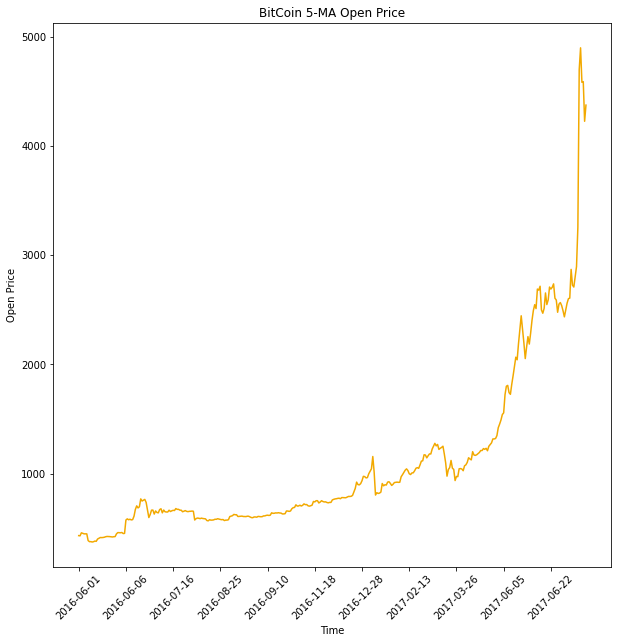

In [29]:
coin = pd.read_csv(path_coin)
# 5-MA 
coin.rolling(5).mean()
# 기간
coin = coin['2016-06-01' <= coin['Date']]
coin = coin[coin['Date'] < '2017-07-01']
coin = coin[::-1]
# 결과
plt.figure(figsize=(10, 10))
plt.title("BitCoin 5-MA Open Price")
plt.xticks([i for i in range(0,len(coin),35)])
plt.xticks(rotation=45)
plt.plot(coin['Date'], coin['Open'], color='#f2a900')
plt.xlabel("Time")
plt.ylabel("Open Price")
plt.show()

## 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.

x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.

이동평균의 기준은 Open Column으로 계산합니다.

이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

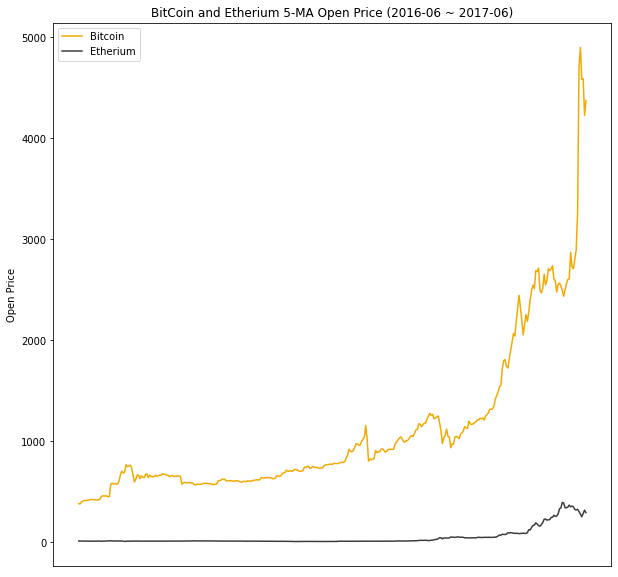

In [63]:
coin = pd.read_csv(path_coin)
eth = pd.read_csv(path_eth)
# 5-MA 
coin.rolling(5).mean()
eth.rolling(5).mean()
# 기간
coin = coin['2016-06-01' <= coin['Date']]
coin = coin[coin['Date'] < '2017-07-01']
coin = coin[:365]
eth = eth['2016-06-01' <= eth['Date']]
eth = eth[eth['Date'] < '2017-07-01']
eth = eth[:365]
x = range(365,0,-1)
# 결과
plt.figure(figsize=(10, 10))
plt.title("BitCoin and Etherium 5-MA Open Price (2016-06 ~ 2017-06)")
plt.xticks(rotation=45)
plt.gca().axes.xaxis.set_visible(False)
plt.plot(x, coin['Open'], color='#f2a900')
plt.plot(x, eth['Open'], color='#3c3c3d')
plt.xlabel("Time")
plt.ylabel("Open Price")
plt.legend(['Bitcoin', 'Etherium'])
plt.show()